### setting

In [31]:
pip install pi-heaan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import piheaan as heaan
from piheaan.math import sort
from piheaan.math import approx # for piheaan math function
import math
import numpy as np
import pandas as pd
import os

In [33]:
# set parameter
params = heaan.ParameterPreset.FGb
context = heaan.make_context(params) # context has paramter information
heaan.make_bootstrappable(context) # make parameter bootstrapable

# create and save keys
key_file_path = "./keys"
sk = heaan.SecretKey(context) # create secret key
os.makedirs(key_file_path, mode=0o775, exist_ok=True)
sk.save(key_file_path+"/secretkey.bin") # save secret key

key_generator = heaan.KeyGenerator(context, sk) # create public key
key_generator.gen_common_keys()
key_generator.save(key_file_path+"/") # save public key

In [34]:
# load secret key and public key
# When a key is created, it can be used again to save a new key without creating a new one
key_file_path = "./keys"

sk = heaan.SecretKey(context,key_file_path+"/secretkey.bin") # load secret key
pk = heaan.KeyPack(context, key_file_path+"/") # load public key
pk.load_enc_key()
pk.load_mult_key()

eval = heaan.HomEvaluator(context,pk) # to load piheaan basic function
dec = heaan.Decryptor(context) # for decrypt
enc = heaan.Encryptor(context) # for encrypt

In [35]:
# log_slots is used for the number of slots per ciphertext
# It depends on the parameter used (ParameterPreset)
# The number '15' is the value for maximum number of slots,
# but you can also use a smaller number (ex. 2, 3, 5, 7 ...)
# The actual number of slots in the ciphertext is calculated as below.
log_slots = 15 
num_slots = 2**log_slots

In [36]:
# a = [0.001*i for i in range(1,129)]
# b = [0.003*i for i in range(1,129)]

# 우리 벡터->웹캠
#a = [0.01,0.02,0.03,0.04,0.05]
a = [0.047040022909641266, -0.15028773248195648, 0.10950139164924622, 0.020573526620864868, -0.13226069509983063, -0.0012948159128427505, -0.22733476758003235, -0.1094701811671257, 0.19367308914661407, -0.240530326962471, -0.01147257536649704, -0.2716149091720581, 0.1313287764787674, -0.1164921298623085, 0.3811497688293457, 0.05937112122774124, -0.1682545691728592, 0.2755020558834076, -0.12615884840488434, 0.003093387931585312, 0.014919758774340153, 0.07610990107059479, -0.13870969414710999, -0.007934934459626675, -0.0572904571890831, -0.23305746912956238, 0.024411289021372795, 0.2450314164161682, -0.061936888843774796, -0.03971607983112335, 0.17291153967380524, 0.21050851047039032, -0.07247556746006012, -0.0721886157989502, -0.008059725165367126, 0.18051299452781677, -0.27308326959609985, -0.14652861654758453, -0.08582301437854767, -0.02034980244934559, 0.06230859458446503, -0.09847082197666168, 0.0620335228741169, -0.06115957349538803, 0.17604346573352814, -0.05691561475396156, -0.15161921083927155, -0.11438306421041489, -0.10416717082262039, 0.09447067230939865, -0.007738862186670303, 0.2748287320137024, 0.15071769058704376, -0.034424759447574615, -0.25922346115112305, 0.4042011797428131, -0.28501468896865845, 0.03548893705010414, 0.13576668500900269, -0.13722071051597595, 0.18365396559238434, -0.24234183132648468, 0.047507498413324356, 0.06945209205150604, 0.0750298947095871, 0.02715117484331131, -0.04596726968884468, -0.12949340045452118, -0.22700688242912292, -0.2533678114414215, 0.4290207028388977, -0.238755464553833, 0.17482437193393707, 0.0048776413314044476, 0.056530117988586426, -0.07950922846794128, -0.26036620140075684, 0.21639147400856018, -0.0807485580444336, 0.0045103393495082855, 0.12609848380088806, 0.08741472661495209, 0.07329674810171127, -0.056119129061698914, -0.18517281115055084, 0.18075820803642273, -0.03986850753426552, -0.14067994058132172, -0.0440722331404686, -0.08035941421985626, 0.20832575857639313, 0.08928465843200684, -0.21843357384204865, -0.009647559374570847, 0.09343110769987106, -0.028583135455846786, -0.1571665108203888, 0.09748106449842453, -0.14769497513771057, 0.07757043838500977, -0.10407910495996475, -0.045119237154722214, 0.13439205288887024, 0.20726707577705383, -0.3741455674171448, 0.027593286707997322, 0.24087931215763092, 0.002081664279103279, -0.10275599360466003, -0.021259313449263573, 0.277192085981369, 0.25618985295295715, -0.16697745025157928, -0.21700558066368103, -0.13433367013931274, 0.003635344561189413, -0.03377223387360573, -0.09005926549434662, -0.17354358732700348, -0.06181354820728302, 0.24254213273525238, 0.08731885254383087, -0.05642819404602051, -0.26448893547058105, -0.026655029505491257, 0.15708133578300476, 0.13344231247901917, -0.08620621263980865, -0.06312478333711624, 0.23803693056106567, -0.14126917719841003, -0.22000354528427124, 0.017356645315885544, 0.03635748475790024, -0.058140311390161514, 0.02626314014196396, 0.026596002280712128, 0.02727404050529003, -0.07543063908815384, 0.4396229386329651, 0.07590676844120026, -0.07545062154531479, -0.14299051463603973, 0.2608959674835205, 0.10330638289451599, -0.024668999016284943, 0.03620901703834534, 0.07499528676271439, 0.14417487382888794, -0.06544400751590729, 0.37466996908187866, 0.006196572910994291, 0.007326733320951462, -0.37793490290641785, -0.1092795878648758, 0.006249844096601009, 0.032634079456329346, -0.019926901906728745, -0.23792310059070587, 0.03204987198114395, -0.28222036361694336, -0.057828668504953384, -0.14943809807300568, -0.19582246243953705, -0.055907271802425385, -0.24184246361255646, 0.1573658436536789, -0.04199890419840813, -0.13449181616306305, -0.14053760468959808, 0.08051923662424088, -0.1729467213153839, 0.04771500453352928, 0.049943119287490845, 0.240220308303833, -0.15489572286605835, -0.03156154975295067, 0.18215817213058472, 0.021577982231974602, -0.024771230295300484, -0.22390241920948029, 0.17647621035575867, 0.11936207860708237, -0.16386421024799347, 0.18414928019046783, -0.08265700936317444, 0.012794523499906063, -0.1145452931523323, 0.06169208139181137, 0.09280910342931747, 0.061740580946207047, -0.196176677942276, 0.024424420669674873, 0.179326131939888, -0.11031205952167511, -0.15133969485759735, 0.14873960614204407, 0.21085913479328156, -0.20076006650924683, 0.1846810132265091, 0.10203279554843903, -0.17596715688705444, 0.0244846660643816, 0.06633758544921875, 0.0113067002967, -0.14726793766021729, 0.09734421223402023, -0.03499442711472511, -0.0657963752746582, 0.03627587854862213, -0.19152820110321045, -0.14805786311626434, 0.10761849582195282, 0.36104118824005127, -0.24245566129684448, -0.053915590047836304, -0.1232602521777153, -0.04994784668087959, -0.15939852595329285, -0.0037584002129733562, -0.2651344835758209, -0.05233396217226982, -0.07089146971702576, -0.04362360015511513, 0.10889007896184921, -0.2372913658618927, 0.2758769392967224, 0.0836128443479538, 0.20622631907463074, -0.18162304162979126, 0.13701097667217255, 0.16763223707675934, -0.2008100152015686, -0.00852024182677269, 0.05478249862790108, -0.08307629823684692, -0.2023104727268219, 0.12073475867509842, -0.17299824953079224, 0.24378640949726105, 0.047064799815416336, -0.3047506809234619, 0.0029211342334747314, 0.09899996221065521, -0.11563963443040848, 0.0736561268568039, -0.028790023177862167, 0.3334560990333557, -0.026333117857575417, -0.27165332436561584, -0.2576938271522522, 0.1270577758550644, 0.3563587963581085, 0.22828058898448944, 0.09787328541278839, -0.12153252214193344, -0.0439780168235302, -0.07137870788574219, 0.12083183228969574, -0.106405109167099, -0.04739530757069588, 0.03456195816397667, -0.45376113057136536, 0.11546410620212555, 0.21201343834400177, 0.05729755386710167, 0.009507434442639351, -0.24825242161750793, -0.0979585349559784, 0.017957936972379684, -0.059034835547208786, -0.021534398198127747, -0.07285568118095398, -0.10951964557170868, 0.1711815595626831, 0.02012624591588974, 0.16027237474918365, 0.22302262485027313, -0.1241011768579483, 0.07335055619478226, -0.10744087398052216, 0.1718972772359848, -0.14899423718452454, 0.08668651431798935, 0.17851874232292175, 0.173940047621727, -0.2589712142944336, 0.23380182683467865, -0.003842344507575035, 0.26367878913879395, 0.023748261854052544, 0.3609234690666199, -0.14390619099140167, -0.014224713668227196, -0.06383276730775833, 0.13269245624542236, -0.24328354001045227, -0.3521021902561188, -0.14744703471660614, 0.1762954592704773, 0.08886543661355972, -0.16619259119033813, -0.12710267305374146, 0.18309572339057922, -0.14548002183437347, 0.21929660439491272, -0.1844196319580078, 0.1382332146167755, -0.1354048252105713, 0.1119607537984848, 0.12940874695777893, 0.003562023863196373, 0.23495358228683472, -0.03282327577471733, 0.42995646595954895, 0.20052696764469147, -0.045288342982530594, -0.195317804813385, -0.11841155588626862, -0.036775022745132446, -0.08361129462718964, 0.03872175142168999, 0.04169812425971031, 0.0384407714009285, 0.013805285096168518, -0.31804874539375305, 0.05033484473824501, 0.11164994537830353, 0.07243677228689194, 0.2494135946035385, -0.06012174114584923, 0.10742410272359848, 0.18550585210323334, -0.08986613899469376, 0.10758458077907562, -0.3902701437473297, 0.2745444178581238, 0.324552446603775, -0.3426383137702942, 0.07533722370862961, -0.45267316699028015, -0.018671493977308273, 0.060509294271469116, -0.11493294686079025, 0.14839492738246918, 0.1464223563671112, -0.062226708978414536, 0.10390300303697586, 0.013583378866314888, 0.089055135846138, 0.2684648334980011, -0.20583967864513397, 0.29904448986053467, -0.3976135551929474, 0.2807970643043518, -0.07660195231437683, 0.11488790810108185, -0.11240721493959427, 0.11214834451675415, -0.30027416348457336, 0.1814897656440735, -0.0013075284659862518, -0.0925733745098114, 0.0694565400481224, 0.2867710590362549, -0.17402581870555878, -0.01881271041929722, -0.011955037713050842, 0.26421239972114563, -0.068032406270504, 0.3062168061733246, 0.2409459352493286, -0.13286548852920532, -0.20820297300815582, -0.07333703339099884, 0.08351762592792511, -0.16601932048797607, -0.00914740189909935, 0.11106876283884048, 0.1890956163406372, -0.20592403411865234, -0.04853222519159317, 0.048523154109716415, -0.11727017909288406, -0.19230765104293823, 0.0648578628897667, -0.054315634071826935, -0.02667994052171707, -0.2897515296936035, 0.08846248686313629, -0.17198070883750916, 0.15296348929405212, 0.15038292109966278, 0.25243014097213745, 0.39905521273612976, 0.041927747428417206, -0.021572701632976532, 0.1726573258638382, 0.16741076111793518, 0.01663796603679657, -0.07149448990821838, 0.08159231394529343, -0.06666325777769089, 0.03292059898376465, 0.09125374257564545, -0.08430343866348267, -0.05753042548894882, 0.1830098032951355, -0.18518222868442535, 0.197890043258667, 0.2008999139070511, 0.15266957879066467, 0.01795005053281784, -0.01617537811398506, 0.2864161431789398, 0.14630810916423798, 0.14136174321174622, 0.1741611659526825, -0.12280463427305222, 0.15788108110427856, -0.04141678661108017, 0.05699896439909935, 0.005436249077320099, 0.11018995940685272, -0.2886141240596771, -0.16343948245048523, 0.24929063022136688, 0.2308732271194458, 0.019294604659080505, -0.2635558247566223, 0.11339643597602844, 0.2863904535770416, -0.24458545446395874, 0.027425311505794525, -0.11899514496326447, -0.2468377649784088, -0.11573028564453125, -0.14547714591026306, 0.2545725107192993, -0.12648354470729828, -0.2611466944217682, -0.11535858362913132, 0.2931031882762909, 0.24310767650604248, 0.012887397781014442, -0.04488300904631615, -0.025428414344787598, 0.10081129521131516, -0.013478755950927734, 0.13275064527988434, 0.2558000385761261, 0.008171048015356064, -0.23181836307048798, -0.08832710981369019, -0.18720762431621552, -0.20922116935253143, -0.1300879418849945, -0.20893150568008423, 0.05559093505144119, 0.14999960362911224, -0.00350363040342927, 0.008362473919987679, -0.14902013540267944, -0.11561501771211624, -0.24916279315948486, -0.21651411056518555, 0.14099520444869995, -0.14518721401691437, -0.08392229676246643, -0.13345643877983093, 0.25412508845329285, -0.028065893799066544, 0.14567267894744873, 0.09461210668087006, -0.32426536083221436, -0.16939201951026917, 0.051293108612298965, 0.16134056448936462, -0.09984341263771057, 0.038208696991205215, -0.08561278134584427, 0.20470458269119263, -0.11041180044412613, 0.07110349088907242, 0.2570827305316925, 0.07124561816453934, 0.05791441351175308, 0.23929950594902039, 0.1554465889930725, 0.1741342842578888, 0.05390751361846924, 0.12007804214954376, -0.06830237805843353, 0.1473037451505661, -0.1692543625831604, 0.09258316457271576, 0.06920517981052399, -0.11564067006111145, -0.0833241418004036, -0.048421211540699005, -0.148781418800354, -0.0016493462026119232, 0.08366045355796814, 0.12220083177089691, 0.06079121679067612, -0.07106185704469681, 0.1552540808916092, 0.09992349147796631, -0.27895092964172363, -0.18544216454029083, 0.09214726835489273, 0.16040875017642975, 0.039073433727025986, -0.1811363250017166, 0.0849125012755394, 0.10279473662376404, -0.022241482511162758, 0.03256721794605255, -0.10606300085783005, -0.04276014491915703, 0.1688743233680725, -0.25981780886650085, -0.016510967165231705, -0.17996565997600555, 0.16310422122478485, -0.16943266987800598, 0.26286306977272034, -0.03397728130221367, -0.21440573036670685, 0.21529917418956757, -0.15243762731552124, -0.005081429611891508, -0.000244838185608387, -0.007634979672729969, -0.12079737335443497, -0.020033299922943115, -0.052426256239414215, -0.21986407041549683, -0.04792311042547226, 0.15314462780952454, -0.054557833820581436, -0.051026590168476105, 0.133080393075943, 0.20831157267093658, -0.03058915212750435, -0.047384921461343765, -0.16017013788223267, 0.12326881289482117, -0.1738773137331009, -0.22365553677082062, -0.13379444181919098, -0.0628395676612854, 0.09644979983568192, -0.16481783986091614, 0.059213075786828995, -0.10015261173248291, 0.1341499239206314, 0.04315105080604553, -0.11645032465457916, -0.22833016514778137, -0.0706096813082695, 0.04830493777990341, 0.017159326002001762, 0.3313901424407959, 0.14569972455501556, -0.10258540511131287, -0.1673579066991806, 0.3513523042201996, -0.3190391957759857, 0.08627623319625854, 0.10393886268138885, -0.16583655774593353, 0.18787577748298645, -0.1732935756444931, 0.05541195347905159, 0.0566088892519474, 0.043709881603717804, -0.041858017444610596, -0.02129065990447998, -0.05796759948134422, -0.302198588848114, -0.2967928647994995, 0.22741198539733887, -0.19384656846523285, 0.11739131808280945, 0.06175971031188965, 0.008103085681796074, -0.07465365529060364, -0.21876370906829834, 0.11685377359390259, -0.1828005462884903, -0.05618671700358391, 0.04989231377840042, 0.1413886696100235, 0.08507853746414185, -0.021869685500860214, -0.2870733439922333, 0.13874779641628265, -0.022491157054901123, -0.08200403302907944, -0.07461739331483841, -0.076388418674469, 0.2096773386001587, 0.06532463431358337, -0.11086037755012512, -0.04261961579322815, 0.2238784283399582, -0.06650151312351227, -0.09148673713207245, 0.012198645621538162, -0.03907386213541031, 0.138816699385643, -0.16393080353736877, -0.02152537927031517, 0.12297661602497101, 0.19553768634796143, -0.2723059058189392, 0.02244729734957218, 0.22568060457706451, 0.020779263228178024, -0.11547242105007172, 0.09588958323001862, 0.21022383868694305, 0.26153355836868286, -0.10504097491502762, -0.12295105308294296, -0.051252324134111404, -0.0813172459602356, 0.07101903855800629, -0.06236008554697037, -0.2758755385875702, -0.0488811619579792, 0.1434929519891739, 0.024400226771831512, -0.09147413074970245, -0.20144721865653992, -0.022271424531936646, 0.08965465426445007, 0.2275121808052063, -0.08888452500104904, -0.07069247215986252, 0.1533406674861908, -0.2768968641757965, -0.22143232822418213, 0.016946326941251755, 0.16585862636566162, -0.07745576649904251, 0.02761288359761238, -0.1331864446401596, 0.08613007515668869, -0.011221364140510559, 0.38233324885368347, 0.03575436770915985, -0.10681642591953278, -0.051513247191905975, 0.23487937450408936, -0.01984241232275963, 0.035899315029382706, 0.10774476826190948, 0.0742398053407669, 0.11157380789518356, -0.056235186755657196, 0.33863112330436707, -0.0747608169913292, 0.019815895706415176, -0.40840229392051697, -0.1791316121816635, 0.06088477000594139, 0.040533699095249176, -0.022568028420209885, -0.1560087949037552, -0.05044775456190109, -0.1754678636789322, 0.02813456952571869, -0.14979946613311768, -0.1325232833623886, 0.08914944529533386, -0.1533360779285431, 0.10141106694936752, -0.1585613191127777, -0.12805435061454773, -0.03993327170610428, 0.028141437098383904, -0.07724930346012115, 0.0348818264901638, -0.07805049419403076, 0.2469354271888733, -0.06909801065921783, 0.022682908922433853, 0.09032842516899109, 0.004189235158264637, 0.04390256106853485, -0.11394946277141571, 0.08060462772846222, 0.17521579563617706, -0.14461398124694824, 0.14955928921699524, -0.06895086169242859, -0.008380841463804245, -0.19104838371276855, 0.07384493947029114, 0.0821712464094162, 0.03616144135594368, -0.18139836192131042, 0.03664739429950714, 0.10836240649223328, -0.10228710621595383, -0.034982360899448395, 0.09674551337957382, 0.25493159890174866, -0.21306325495243073, 0.17896486818790436, 0.17982670664787292, -0.10272253304719925, 0.09588570892810822, 0.04417889565229416, 0.011868378147482872, -0.2510540783405304, 0.05318251997232437, 0.002785895485430956, -0.05035064369440079, 0.017966166138648987, -0.11250791698694229, -0.09854663908481598, -0.004748104140162468, 0.22652193903923035, -0.2535223662853241, -0.10589133203029633, -0.04027434438467026, -0.07439830899238586, -0.15223976969718933, -0.07563690096139908, -0.204741969704628, -0.049384113401174545, -0.04509262368083, -0.10262265801429749, 0.070486880838871, -0.27970826625823975, 0.3533693552017212, 0.07760629802942276, 0.1522647738456726, -0.10595714300870895, 0.13232702016830444, 0.08588529378175735, -0.29138118028640747, 0.014563115313649178, 0.054543327540159225, 0.026056062430143356, -0.15270258486270905, 0.07077862322330475, -0.11921250820159912, 0.26361846923828125, 0.020061954855918884, -0.30032190680503845, -0.08296055346727371, 0.12539684772491455, -0.07576823234558105, 0.13141505420207977, 0.017344146966934204, 0.30223992466926575, -0.053185634315013885, -0.26133453845977783, -0.11334563791751862, 0.18396210670471191, 0.21317234635353088, 0.2886159420013428, 0.08354811370372772, -0.12756551802158356, -0.08212414383888245, -0.032824642956256866, 0.08992063254117966, 0.043370041996240616, 0.030776280909776688, 0.03936999291181564, -0.4540962278842926, 0.08788763731718063, 0.06380827724933624, 0.006927626207470894, -0.044118721038103104, -0.11504609882831573, -0.08430341631174088, 0.0611334890127182, -0.016041655093431473, -0.031901415437459946, 0.025422275066375732, 0.005727791227400303, 0.16434665024280548, -0.01191677525639534, 0.13891685009002686, 0.11676852405071259, -0.0966402068734169, -0.04677794873714447, -0.0897410586476326, 0.11214660853147507, -0.0797584280371666, 0.06364963948726654, 0.11114951223134995, 0.29544419050216675, -0.16201242804527283, 0.32007312774658203, -0.05404793098568916, 0.25074663758277893, 0.016897359862923622, 0.30524319410324097, -0.17060337960720062, -0.07253234088420868, -0.06675361096858978, 0.07143057137727737, -0.2280794084072113, -0.13197529315948486, -0.20202822983264923, 0.19232098758220673, 0.010061262175440788, -0.17471352219581604, -0.20026390254497528, 0.1256597936153412, -0.23999159038066864, 0.2083701640367508, -0.13949254155158997, 0.14392215013504028, -0.24450987577438354, 0.1522911638021469, 0.1438165307044983, 0.004453006200492382, 0.263911634683609, -0.015678130090236664, 0.4532911777496338, 0.27428457140922546, -0.061144206672906876, -0.20145002007484436, -0.10955454409122467, -0.022328730672597885, -0.07910853624343872, -0.06825345754623413, -0.00422513484954834, 0.09674828499555588, 0.01930408924818039, -0.36320099234580994, 0.05897315964102745, 0.093330517411232, 0.21679235994815826, 0.13844892382621765, -0.0491085909307003, 0.23877142369747162, 0.1384744793176651, -0.02297545224428177, 0.1139690950512886, -0.34763064980506897, 0.21672323346138, 0.2965996265411377, -0.37603795528411865, -0.07055477052927017, -0.3983243405818939, 0.04292965307831764, 0.08505871891975403, -0.07020137459039688, 0.15757693350315094, 0.05968478322029114, -0.01662224531173706, 0.06669281423091888, 0.07703523337841034, 0.09624075889587402, 0.22960643470287323, -0.09767298400402069, 0.2526782751083374, -0.3410261869430542, 0.21411973237991333, -0.1638208031654358, 0.10111457109451294, 0.03663795441389084, 0.0017204340547323227, -0.3565470576286316, 0.11083359271287918, 0.012139606289565563, -0.10961221903562546, 0.07615065574645996, 0.2795672118663788, -0.17109136283397675, 0.03374958038330078, -0.0812380388379097, 0.3034849166870117, -0.07306624948978424, 0.21902617812156677, 0.1405198872089386, -0.17238403856754303, -0.19275298714637756, -0.014523535966873169, -0.03305421024560928, -0.020856598392128944, 0.05603714659810066, 0.07708442956209183, 0.00960431806743145, -0.16742108762264252, -0.045980483293533325, 0.04468746855854988, -0.18136008083820343, -0.21104733645915985, 0.057001374661922455, -0.1342518925666809, -0.06725364923477173, -0.21977195143699646, 0.13378506898880005, -0.19052332639694214, 0.21750959753990173, 0.12912508845329285, 0.14313356578350067, 0.31988149881362915, 0.02702111005783081, -0.054221320897340775, 0.21155014634132385, 0.16204607486724854, 0.044076014310121536, -0.03157197684049606, 0.08465587347745895, -0.017788544297218323, 0.0858926922082901, 0.013080747798085213, -0.07123856246471405, -0.07595887780189514, 0.042694494128227234, -0.1615336835384369, 0.1934475600719452, 0.11169855296611786, 0.11739040911197662, 0.05162491276860237, 0.007772759068757296, 0.24979069828987122, 0.20418664813041687, 0.12252601236104965, 0.1266762912273407, -0.027121800929307938, 0.15225772559642792, 0.10993165522813797, 0.019571393728256226, -0.022382698953151703, 0.1335819959640503, -0.18011735379695892, -0.1153038814663887, 0.28458693623542786, 0.16118000447750092, 0.18896076083183289, -0.22049599885940552, 0.05531379207968712, 0.2746371030807495, -0.1879168003797531, 0.1279805302619934, -0.008062314242124557, -0.18579712510108948, -0.0865023210644722, -0.17466382682323456, 0.1046203225851059, -0.03149223327636719, -0.3157587945461273, -0.05164485052227974, 0.20624567568302155, 0.19617879390716553, 0.105535127222538, 0.04693488031625748, -0.11836536973714828, 0.01142838504165411, -0.10423080623149872, 0.11117648333311081, 0.09746409952640533, 0.10941611230373383, -0.2666318118572235, -0.15789243578910828, -0.1676659882068634, -0.2812506854534149, -0.04031442850828171, -0.0939919650554657, 0.06956230849027634, 0.2298794686794281, 0.06842619925737381, -0.11724033206701279, 0.005120688118040562, -0.007572898641228676, -0.16409210860729218, -0.18857601284980774, -0.005379822105169296, -0.13705109059810638, 0.05204929783940315, -0.08545099943876266, 0.32328543066978455, -0.01685468479990959, 0.12883520126342773, 0.08760562539100647, -0.20217545330524445, -0.03257180377840996, 0.018302947282791138, 0.21444126963615417, -0.11752500385046005, 0.04076310619711876, -0.10780763626098633, 0.2754574716091156, -0.11111487448215485, 0.0065607004798948765, 0.23826777935028076, 0.17558394372463226, 0.10984615981578827, 0.18480131030082703, 0.16893739998340607, 0.1389027237892151, 0.10938829183578491, 0.027331896126270294, -0.06279867887496948, 0.15750692784786224, -0.1664430946111679, 0.13870936632156372, 0.06374231725931168, -0.17588329315185547, -0.0835391953587532, -0.007120219990611076, -0.18040941655635834, 0.026743480935692787, 0.06803715974092484, 0.13752248883247375, 0.025397509336471558, -0.05358210206031799, 0.15139716863632202, 0.1463755965232849, -0.23807531595230103, -0.20875488221645355, 0.05483883246779442, 0.13748274743556976]

# 디비사진
#b = [0.02,0.04,0.06,0.08,0.09]
b = [-0.08480368554592133, 0.0333043709397316, 0.19761811196804047, -0.11739709228277206, 0.002904556691646576, 0.033296361565589905, 0.01642950437963009, -0.01828760839998722, 0.2236097753047943, 0.018301326781511307, -0.1823199838399887, -0.10789981484413147, 0.014075583778321743, -0.28459641337394714, 0.29895421862602234, 0.07062829285860062, -0.16417469084262848, 0.1079479306936264, -0.19895799458026886, 0.04949362203478813, 0.11860250681638718, 0.10641356557607651, -0.23771987855434418, -0.11300661414861679, -0.1863265037536621, -0.06556956470012665, -0.03690000995993614, 0.07237864285707474, -0.045582015067338943, 0.07480467855930328, 0.14443904161453247, 0.07919636368751526, -0.07768216729164124, -0.05171293020248413, -0.019865095615386963, 0.18190792202949524, -0.04534114897251129, -0.15620779991149902, -0.1333465874195099, 0.09400741755962372, 0.020236896350979805, 0.009426277130842209, 0.07768487930297852, 0.07109546661376953, 0.07612888514995575, -0.16255894303321838, 0.07744818180799484, -0.08297515660524368, -0.11758702993392944, 0.08121532946825027, -0.0398276224732399, 0.11068633943796158, 0.005130003206431866, -0.18688850104808807, -0.10338324308395386, 0.28355181217193604, -0.16895541548728943, 0.07192187011241913, -0.0370224267244339, -0.15910708904266357, -0.027145864441990852, -0.27537450194358826, 0.0648791640996933, -0.019069913774728775, -0.11635343730449677, 0.09386536478996277, 0.17690201103687286, -0.08413473516702652, -0.09449099004268646, -0.11593419313430786, 0.32968267798423767, -0.3759659230709076, -0.10421894490718842, 0.03082440420985222, 0.10418403893709183, -0.15545602142810822, -0.1215984970331192, 0.009623249992728233, -0.02205432951450348, -0.13691546022891998, 0.14554989337921143, 0.07793837785720825, 0.2522340416908264, -0.06040888652205467, -0.20673757791519165, 0.11895876377820969, -0.007629447616636753, -0.08044206351041794, -0.10755908489227295, -0.0895157903432846, 0.2782520055770874, 0.06850606203079224, -0.2129734456539154, -0.10738997906446457, 0.0030257476028054953, -0.1488955020904541, -0.09982380270957947, -0.0426967591047287, 0.10294000059366226, 0.01870410516858101, -0.12936744093894958, -0.10895618796348572, 0.11662217974662781, 0.018237711861729622, -0.15382441878318787, -0.0343407467007637, 0.15611571073532104, 0.03428564965724945, -0.10173244774341583, -0.18377183377742767, 0.3105521500110626, 0.05600652098655701, -0.11305554956197739, -0.11172056943178177, -0.09165659546852112, -0.14324851334095, -0.004902677610516548, 0.053757332265377045, -0.012608695775270462, 0.23462146520614624, 0.09706360101699829, 0.09309280663728714, -0.21290439367294312, -0.037072230130434036, -0.051863543689250946, 0.08838531374931335, 0.03152461349964142, -0.07419983297586441, -0.30039945244789124, 0.1415446400642395, -0.11731308698654175, -0.00998672191053629, 0.08162352442741394, -0.07899128645658493, 0.03119569644331932, 0.10841692984104156, -0.1799633651971817, -0.00108790781814605, -0.010927874594926834, 0.3336758315563202, 0.0043877121061086655, -0.15387804806232452, -0.24649126827716827, 0.19645532965660095, -0.047967564314603806, 0.061343200504779816, 0.0328666977584362, 0.036788128316402435, 0.14767253398895264, -0.03700315207242966, 0.10175290703773499, -0.012944860383868217, 0.07717256993055344, -0.10665664821863174, 0.11625674366950989, -0.08151926845312119, 0.07350695133209229, -0.012549621053040028, -0.12929795682430267, 0.07743406295776367, -0.2893677353858948, -0.07923369109630585, -0.15137530863285065, -0.3189426362514496, 0.17769163846969604, -0.12889719009399414, 0.19893017411231995, -0.001547355204820633, -0.05469967797398567, -0.03394438326358795, 0.1165461465716362, -0.0012978333979845047, 0.17117077112197876, 0.030444765463471413, 0.07113993167877197, 0.07157561182975769, -0.1533224880695343, -0.05132492259144783, 0.0030104489997029305, -0.10729949176311493, -0.1258922964334488, 0.18915732204914093, -0.17964716255664825, -0.09105890244245529, 0.23070871829986572, -0.07128537446260452, 0.008478965610265732, 0.10787378996610641, 0.08271467685699463, 0.1638573706150055, 0.06864039599895477, -0.1276451200246811, 0.07604645937681198, -0.06226729974150658, -0.18961399793624878, 0.17875677347183228, 0.045700982213020325, -0.050078749656677246, -0.047708410769701004, 0.18768832087516785, -0.010781313292682171, -0.19273744523525238, 0.10491515696048737, 0.11864414811134338, 0.010365523397922516, 0.053829699754714966, 0.2262151539325714, -0.03120298683643341, -0.08439566940069199, 0.13583488762378693, -0.023099876940250397, -0.13227567076683044, 0.07697544991970062, 0.1634581983089447, -0.28617382049560547, -0.16252776980400085, -0.22541432082653046, -0.018237881362438202, -0.1356688141822815, 0.2910795211791992, -0.18157194554805756, -0.028797157108783722, -0.15511977672576904, 0.09538616985082626, 0.08368216454982758, -0.13130886852741241, 0.22550499439239502, 0.019139578565955162, 0.13106825947761536, -0.20026758313179016, -0.017929069697856903, 0.08262830972671509, -0.0555432066321373, -0.035615697503089905, 0.1534281224012375, 0.025637738406658173, -0.2914501428604126, 0.058924123644828796, -0.03600691258907318, 0.13675284385681152, -0.06529705226421356, -0.17954732477664948, 0.012345291674137115, 0.2430131584405899, -0.08766824007034302, -0.05544058978557587, 0.17736470699310303, 0.13889217376708984, 0.10496041923761368, -0.19387705624103546, -0.23917017877101898, -0.020539123564958572, 0.23063382506370544, 0.24583721160888672, 0.04300720617175102, 0.008156406693160534, 0.02416163682937622, -0.21611997485160828, 0.044376932084560394, -0.04289970174431801, 0.04422438144683838, 0.0014154557138681412, -0.3622606694698334, 0.15128935873508453, 0.23710644245147705, -0.032847609370946884, -0.008387049660086632, -0.038794249296188354, -0.08765839040279388, 0.045983366668224335, 0.05341704562306404, 0.15186330676078796, -0.058111272752285004, -0.09501771628856659, 0.09191977232694626, 0.04435357078909874, 0.13171502947807312, 0.1514090895652771, -0.2600761353969574, 0.055855974555015564, -0.011362876743078232, 0.08695004135370255, 0.0837865024805069, 0.009562663733959198, 0.1729561686515808, 0.018076639622449875, -0.11003854870796204, 0.015601355582475662, -0.08949565887451172, 0.1770962029695511, -0.05578178912401199, 0.07321188598871231, -0.20009785890579224, -0.15969812870025635, 0.009164530783891678, 0.060063738375902176, 0.02162087708711624, -0.0760071650147438, -0.19080321490764618, 0.20154908299446106, -0.0492733009159565, -0.1492602378129959, 0.11772099137306213, 0.045490048825740814, -0.1487906277179718, 0.1948728859424591, -0.13611504435539246, 0.06458789110183716, -0.0967118889093399, 0.06470143049955368, 0.2089672088623047, 0.05952748283743858, -0.015874486416578293, -0.03310296684503555, 0.36016157269477844, -0.0035934830084443092, 0.07423645257949829, 0.038972750306129456, -0.2606006860733032, -0.07635252177715302, 0.11185562610626221, 0.055050697177648544, 0.205686554312706, 0.08159984648227692, -0.09691791236400604, -0.33949872851371765, -0.08894213289022446, -0.06230995059013367, -0.07591325789690018, 0.1123620942234993, -0.08164948225021362, 0.0487326979637146, 0.1499984711408615, -0.23814505338668823, 0.035978928208351135, -0.3073171377182007, 0.38163724541664124, 0.015391925349831581, -0.26960790157318115, 0.1304713487625122, -0.371268630027771, 0.0378367155790329, 0.10117843002080917, -0.09981662034988403, 0.10963074117898941, 0.006286140531301498, -0.029680505394935608, 0.010116313584148884, -0.19158262014389038, 0.034544188529253006, 0.15157294273376465, -0.048647716641426086, 0.255312442779541, -0.15788596868515015, 0.10274796932935715, 0.024223551154136658, -0.0368603840470314, 0.13377690315246582, 0.001127457246184349, -0.024596359580755234, 0.1824714094400406, 0.18266960978507996, 0.0031519103795289993, 0.06715281307697296, 0.30549657344818115, -0.04972958564758301, 0.0019660471007227898, -0.04530208557844162, 0.27390775084495544, -0.10728772729635239, 0.06727684289216995, 0.12955251336097717, -0.04565687105059624, 0.08697697520256042, -0.008917346596717834, 0.15477323532104492, -0.14281310141086578, -0.05973239615559578, 0.11842092871665955, 0.1639389842748642, -0.2407362312078476, -0.037376053631305695, -0.031175244599580765, -0.09944130480289459, -0.2613956928253174, 0.10397952795028687, 0.02327549457550049, 0.09144453704357147, -0.08361320197582245, -0.05222930759191513, -0.1732739955186844, 0.20591646432876587, 0.16690240800380707, -0.0231464933604002, 0.1701529324054718, 0.07814094424247742, -0.006901539862155914, -0.042298056185245514, 0.1427028477191925, -0.07732439786195755, 0.04073122888803482, -0.23079703748226166, 0.05441104993224144, 0.001777971163392067, -0.006913549266755581, 0.08367504179477692, 0.0583680123090744, 0.12434829026460648, -0.01999831572175026, 0.2775052785873413, 0.13403229415416718, 0.11114990711212158, 0.2125396579504013, -0.10487349331378937, 0.4790424406528473, 0.12177534401416779, 0.12958034873008728, 0.07259707897901535, 0.09383013099431992, -0.02988371253013611, -0.06148267537355423, -0.18303073942661285, -0.028100792318582535, 0.06622891128063202, -0.06459004431962967, -0.0772448256611824, 0.1382645219564438, 0.022619742900133133, 0.058523666113615036, -0.15954425930976868, 0.03716455399990082, 0.11057095229625702, -0.24162349104881287, -0.015057522803544998, 0.03145698085427284, -0.0618581585586071, -0.01009342074394226, 0.15127615630626678, 0.08582355827093124, -0.016420729458332062, -0.23809456825256348, -0.01594625785946846, -0.04846063256263733, -0.19365811347961426, -0.07185643911361694, -0.15303733944892883, -0.2606138288974762, -0.048085227608680725, -0.0502462163567543, 0.07460812479257584, 0.1866244375705719, 0.06479698419570923, -0.2708944082260132, -0.20637428760528564, -0.04545023664832115, -0.1293569952249527, -0.17144612967967987, -0.08660668134689331, 0.13323237001895905, 0.029255399480462074, -0.02286514639854431, 0.04295388236641884, -0.07688398659229279, -0.3679252862930298, -0.4029437303543091, -0.02972826361656189, -0.1916605681180954, -0.011202379129827023, 0.031991176307201385, 0.15494857728481293, 0.004499003291130066, 0.04618919640779495, 0.11328774690628052, 0.17468665540218353, -0.3025290369987488, -0.2129758894443512, -0.12972009181976318, 0.04997630789875984, -0.03086262196302414, 0.04618692025542259, -0.03515184298157692, 0.16141289472579956, 0.032897427678108215, 0.11650485545396805, 0.06252545118331909, 0.03847142681479454, 0.06950030475854874, 0.1835515946149826, 0.10898169875144958, 0.03856263309717178, -0.060920752584934235, -0.06621114164590836, -0.0017319098114967346, 0.06908337771892548, -0.16114820539951324, 0.12207160890102386, 0.13040970265865326, -0.22641821205615997, 0.026691345497965813, 0.15081492066383362, -0.16873155534267426, -0.008742114529013634, 0.018994910642504692, 0.09046737849712372, -0.0820884257555008, -0.026322245597839355, 0.015703104436397552, 0.06085318326950073, -0.31678926944732666, -0.17218981683254242, 0.05863327160477638, -0.08593879640102386, -0.16321834921836853, 0.025095976889133453, 0.037099480628967285, -0.10614956170320511, -0.008914638310670853, -0.03339582309126854, -0.01930023729801178, -0.009850742295384407, 0.1467593014240265, -0.011289305984973907, -0.15747544169425964, -0.1289568394422531, 0.060456208884716034, -0.31316694617271423, 0.32110726833343506, 0.05491513013839722, -0.1692945808172226, 0.20859424769878387, -0.17778831720352173, 0.11451219022274017, 0.1379915326833725, 0.11623969674110413, -0.1928912103176117, -0.2359652817249298, -0.23883676528930664, -0.10974320769309998, -0.05225163698196411, 0.052804067730903625, 0.03768426179885864, 0.1089690774679184, 0.09135176986455917, 0.08931991457939148, -0.05722082033753395, -0.021524755284190178, -0.034395985305309296, 0.17130529880523682, -0.055851519107818604, -0.1276789903640747, -0.10745429992675781, 0.06409400701522827, 0.0334615632891655, 0.01804814487695694, -0.03306668996810913, 0.1233866810798645, -0.023659193888306618, -0.17502287030220032, 0.11315286159515381, 0.022197917103767395, -0.0728212222456932, 0.10693059116601944, -0.0693945661187172, 0.11258721351623535, -0.056239038705825806, -0.05278799682855606, -0.05956023186445236, 0.34780189394950867, -0.29036450386047363, -0.0014428915455937386, -0.07441838085651398, -0.08393676578998566, -0.06569657474756241, -0.2133554220199585, 0.029327668249607086, -0.020392555743455887, -0.16223964095115662, 0.1289764791727066, 0.13517995178699493, -0.073554128408432, -0.10093225538730621, -0.14374646544456482, 0.23061536252498627, -0.35362187027931213, -0.12103350460529327, -0.08497704565525055, 0.25872328877449036, -0.22332848608493805, -0.15985439717769623, 0.050910890102386475, 0.04110087454319, -0.11526460945606232, 0.05965501815080643, 0.09935255348682404, 0.39562851190567017, -0.01482370961457491, -0.2169102281332016, 0.1667279303073883, 0.022561870515346527, -0.14709416031837463, -0.07976382225751877, -0.1351560801267624, 0.24171195924282074, 0.1217428594827652, -0.22567515075206757, -0.09256350249052048, 0.0291306059807539, -0.14895322918891907, -0.13078802824020386, -0.12205488234758377, 0.07679372280836105, 0.040752384811639786, -0.14299005270004272, -0.055096764117479324, 0.18548870086669922, 0.04699937626719475, -0.07108122855424881, -0.06463479995727539, 0.0598793625831604, 0.07545177638530731, -0.16996470093727112, -0.16868923604488373, 0.31237342953681946, 0.07834416627883911, -0.10344970971345901, -0.07083850353956223, -0.16847233474254608, -0.13473494350910187, 0.030389275401830673, 0.07295998930931091, 0.0833732858300209, 0.19789591431617737, 0.10803252458572388, 0.046234652400016785, -0.15564338862895966, 0.02350185438990593, -0.04367256537079811, 0.15475037693977356, 0.02601936087012291, -0.12143329530954361, -0.3347957730293274, 0.0552036389708519, -0.2791854441165924, 5.9029494877904654e-05, 0.08141613006591797, -0.02329951897263527, 0.01577036827802658, 0.14840511977672577, -0.1619654893875122, -0.07550731301307678, 0.04380851238965988, 0.3529989719390869, -0.02129349857568741, -0.20067085325717926, -0.2196616679430008, 0.1924583613872528, -0.03968742489814758, 0.011219881474971771, 0.03025110438466072, 0.01269383355975151, 0.1447581946849823, -0.10546528548002243, 0.09288214147090912, 0.14368325471878052, 0.15306901931762695, -0.13049723207950592, 0.10571669042110443, -0.12252091616392136, 0.033631760627031326, 0.11242245882749557, -0.13759329915046692, 0.10256931930780411, -0.227865070104599, -0.13785754144191742, -0.12019906938076019, -0.21646037697792053, 0.10845411568880081, -0.11007436364889145, 0.24432089924812317, 0.009275962598621845, -0.11806236952543259, -0.032541096210479736, 0.03431585431098938, 0.01596848852932453, 0.11502933502197266, 0.042828626930713654, -0.03584868460893631, -0.002648903988301754, -0.10819332301616669, -0.08701591938734055, 0.040519118309020996, -0.20723263919353485, -0.18485742807388306, 0.21077404916286469, -0.15475012362003326, -0.12349019944667816, 0.1430187225341797, -0.05274301767349243, -0.06154443696141243, 0.1741953194141388, 0.18938802182674408, 0.22468961775302887, 0.08501440286636353, -0.05676257610321045, 0.11220330744981766, -0.06036995351314545, -0.11194731295108795, 0.14041192829608917, 0.0027406029403209686, -0.05171138793230057, -0.07234642654657364, 0.24564887583255768, 0.08665375411510468, -0.16280364990234375, 0.033541612327098846, 0.05302008241415024, -0.0360402949154377, -0.05922620743513107, 0.28973209857940674, -0.10481279343366623, -0.16419780254364014, 0.2494836151599884, 0.010402465239167213, -0.10413184016942978, -0.004480129107832909, 0.062268272042274475, -0.24147488176822662, -0.1580219268798828, -0.14714772999286652, 0.04100760072469711, -0.1402474343776703, 0.3321165442466736, -0.17270484566688538, 0.021903635933995247, -0.16642209887504578, 0.039511874318122864, 0.07929202169179916, -0.22014403343200684, 0.27158254384994507, -0.06860228627920151, 0.22787444293498993, -0.14419080317020416, -0.004604453220963478, 0.08620047569274902, -0.016950270161032677, -0.10444051772356033, 0.13210076093673706, -0.03834648057818413, -0.2921305298805237, 0.025339340791106224, 0.005312411114573479, 0.11751946806907654, -0.013589845038950443, -0.1777532547712326, 0.04792402684688568, 0.20030780136585236, -0.07064727693796158, -0.07558540999889374, 0.07702317833900452, 0.14208683371543884, 0.17042943835258484, -0.15748491883277893, -0.24690651893615723, -0.07822518795728683, 0.18129272758960724, 0.21755154430866241, 0.014157386496663094, 0.029589751735329628, 0.027472393587231636, -0.1187857836484909, -0.0032786577939987183, -0.028826458379626274, 0.057657137513160706, -0.030500512570142746, -0.37909388542175293, 0.10068832337856293, 0.10384423285722733, -0.029020454734563828, -0.04174385219812393, -0.11983521282672882, -0.1391983926296234, 0.13256549835205078, 0.02337498590350151, 0.22026211023330688, -0.04250064864754677, -0.009943589568138123, 0.07978285849094391, -0.029774785041809082, 0.12846140563488007, 0.215605691075325, -0.17150069773197174, 0.1293143630027771, 0.03671758621931076, 0.09241713583469391, 0.07181041687726974, 0.0004408508539199829, 0.12398842722177505, 0.015876777470111847, -0.06839693337678909, 0.057220928370952606, 0.028543595224618912, 0.3468235731124878, -0.14185719192028046, 0.05469399690628052, -0.17988209426403046, -0.14440199732780457, 0.04176998883485794, 0.033192843198776245, -0.02158801257610321, -0.08992204815149307, -0.23776407539844513, 0.17437614500522614, -0.0024442607536911964, -0.1445438414812088, 0.11404149234294891, 0.0005514947697520256, -0.05126617103815079, 0.08842253684997559, -0.1682034730911255, 0.05709988623857498, -0.12298223376274109, -0.03815993666648865, 0.15284410119056702, -0.01841002330183983, 0.013905460014939308, -0.013557527214288712, 0.3925533890724182, 0.03472144156694412, 0.05527609586715698, 0.06582771241664886, -0.34646353125572205, -0.0777994841337204, 0.11057455837726593, -0.023815667256712914, 0.15455207228660583, 0.10339586436748505, -0.11041419953107834, -0.31362828612327576, -0.1512339562177658, -0.011031568050384521, 0.033510882407426834, 0.11883052438497543, -0.027596622705459595, 0.09054558724164963, 0.18053172528743744, -0.2678179144859314, -0.001808074302971363, -0.2623833417892456, 0.2542448341846466, -0.007691066712141037, -0.19816672801971436, 0.05505771562457085, -0.3308643102645874, 0.15603674948215485, 0.14075884222984314, -0.09774275124073029, 0.2203497737646103, 0.04780057072639465, -0.058179449290037155, 0.01925692707300186, -0.11312144249677658, 0.05656944587826729, 0.12164898961782455, -0.06767603754997253, 0.3623487055301666, -0.21185307204723358, 0.1315954625606537, -0.0036571831442415714, -0.009282669052481651, 0.08986173570156097, -0.016834385693073273, -0.1876530647277832, 0.2025015652179718, 0.23623238503932953, -0.022963350638747215, 0.06843049824237823, 0.30589544773101807, 0.002896927297115326, 0.03308073431253433, -0.045187778770923615, 0.2055341601371765, -0.2155171036720276, 0.03138570487499237, 0.095785953104496, -0.027715124189853668, 0.09915616363286972, 0.01776975765824318, 0.2143072634935379, -0.039559632539749146, -0.13076478242874146, 0.03339973837137222, 0.0853942409157753, -0.28779494762420654, -0.055792052298784256, -0.02829931676387787, -0.11735595017671585, -0.3107161521911621, 0.09447916597127914, -0.02585584670305252, 0.15190812945365906, -0.035714615136384964, 0.027490291744470596, -0.07644132524728775, 0.15776824951171875, 0.18443018198013306, -0.0878705233335495, 0.1792660802602768, 0.06880532205104828, -0.05791419744491577, -0.024785978719592094, 0.14203256368637085, -0.02087959460914135, -0.01914791576564312, -0.1672181785106659, 0.10932605713605881, 0.060808755457401276, 0.03482051193714142, 0.023287612944841385, 0.04208303242921829, -0.013341118581593037, -0.0922946035861969, 0.3006901443004608, 0.15615907311439514, 0.10716503858566284, 0.20837531983852386, -0.13219235837459564, 0.4301150441169739, 0.15811309218406677, 0.1488828957080841, 0.012837615795433521, -0.02757089212536812, -0.1493338644504547, -0.04430747032165527, -0.16645170748233795, -0.05559258162975311, 0.13270574808120728, -0.015438681468367577, 0.01938718743622303, 0.17573057115077972, -0.1094367653131485, 0.10537104308605194, -0.08182648569345474, 0.04497235268354416, 0.15790128707885742, -0.29406142234802246, -0.012937062419950962, 0.05211116001009941, -0.05428022891283035, 0.005228197667747736, 0.14111264050006866, 0.24591225385665894, -0.09255016595125198, -0.2897409200668335, -0.0554405115544796, 0.009110335260629654, -0.21267415583133698, -0.06886956840753555, -0.04798278585076332, -0.2927238643169403, -0.022724375128746033, -0.1067332923412323, 0.15968379378318787, 0.22294935584068298, 0.07042814791202545, -0.2286950945854187, -0.2542814016342163, -0.05184701830148697, -0.16659988462924957, -0.17611785233020782, -0.09397130459547043, 0.1389976292848587, 0.060407333076000214, 0.012273401021957397, 0.06497643142938614, -0.05049850419163704, -0.43485361337661743, -0.41683757305145264, 0.012200890108942986, -0.19225426018238068, -0.13153907656669617, 0.04524336755275726, 0.1541307419538498, 0.02515537664294243, 0.016108743846416473, 0.17938332259655, 0.1896676868200302, -0.28846508264541626, -0.25936949253082275, -0.1333507001399994, 0.023749422281980515, 0.06638722121715546, 0.05167256295681, -0.04245063289999962, 0.1060563176870346, -0.042209938168525696, 0.15345683693885803, 0.09951683133840561, 0.12491966038942337, -0.0637938603758812, 0.2419068068265915, 0.0509810596704483, 0.15926072001457214, 0.015703996643424034, -0.10599762201309204, 0.0027733035385608673, -0.05115090310573578, -0.08261388540267944, 0.11561660468578339, 0.15255172550678253, -0.26443201303482056, -0.09455384314060211, 0.1346840262413025, -0.08361320942640305, -0.0994086042046547, 0.04947703331708908, 0.06059659644961357, -0.1306859701871872, -0.047145113348960876, 0.01271292008459568, 0.08322873711585999, -0.31799453496932983, -0.12543612718582153, 0.15364141762256622, -0.14541327953338623]

a = a + (num_slots-len(a))*[0]
b = b+ (num_slots-len(b))*[0]


In [37]:
print(a)
print(b)

[0.047040022909641266, -0.15028773248195648, 0.10950139164924622, 0.020573526620864868, -0.13226069509983063, -0.0012948159128427505, -0.22733476758003235, -0.1094701811671257, 0.19367308914661407, -0.240530326962471, -0.01147257536649704, -0.2716149091720581, 0.1313287764787674, -0.1164921298623085, 0.3811497688293457, 0.05937112122774124, -0.1682545691728592, 0.2755020558834076, -0.12615884840488434, 0.003093387931585312, 0.014919758774340153, 0.07610990107059479, -0.13870969414710999, -0.007934934459626675, -0.0572904571890831, -0.23305746912956238, 0.024411289021372795, 0.2450314164161682, -0.061936888843774796, -0.03971607983112335, 0.17291153967380524, 0.21050851047039032, -0.07247556746006012, -0.0721886157989502, -0.008059725165367126, 0.18051299452781677, -0.27308326959609985, -0.14652861654758453, -0.08582301437854767, -0.02034980244934559, 0.06230859458446503, -0.09847082197666168, 0.0620335228741169, -0.06115957349538803, 0.17604346573352814, -0.05691561475396156, -0.151619

### cosine distance

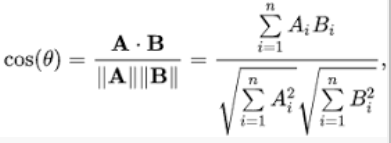

In [38]:
def cosin_sim(a,b,eval,enc,dec,sk,pk,log_slots,num_slots,context):

  # denominator
  msg1 = heaan.Message(log_slots)
  msg2 = heaan.Message(log_slots)
  for i in range(num_slots):
    msg1[i] = a[i]
    msg2[i] = b[i]

  # mult 
  ctxt1 = heaan.Ciphertext(context)
  ctxt2 = heaan.Ciphertext(context)
  ctxt3 = heaan.Ciphertext(context)

  enc.encrypt(msg1, pk, ctxt1)
  enc.encrypt(msg2, pk, ctxt2)
  eval.mult(ctxt1, ctxt2, ctxt3)

  # sigma
  denom_ctxt = heaan.Ciphertext(context)
  eval.left_rotate_reduce(ctxt3,1,num_slots,denom_ctxt)
 
  # numerator

  ## how to calculate without sqrt?

  # square
  ctxt1_sqr = heaan.Ciphertext(context)
  eval.square(ctxt1, ctxt1_sqr)

  ctxt2_sqr = heaan.Ciphertext(context)
  eval.square(ctxt2, ctxt2_sqr)

  # sigma
  ctxt1_rot = heaan.Ciphertext(context)
  eval.left_rotate_reduce(ctxt1_sqr,1,num_slots,ctxt1_rot)

  ctxt2_rot = heaan.Ciphertext(context)
  eval.left_rotate_reduce(ctxt2_sqr,1,num_slots,ctxt2_rot)

  # sqrt
  ## sigma 결과값 범위 : 대략 10 ~ 30
  ## divide by 100 and mult 10 to later result value
  ## input range : 2^-18 ≤ x ≤ 2

  hun_msg = heaan.Message(log_slots)
  for i in range(num_slots):
    hun_msg[i] = 0.01

  eval.mult(ctxt1_rot,hun_msg,ctxt1_rot)

  eval.mult(ctxt2_rot,hun_msg,ctxt2_rot)

  ctxt1_sqrt = heaan.Ciphertext(context)
  approx.sqrt(eval,ctxt1_rot,ctxt1_sqrt)

  ctxt2_sqrt = heaan.Ciphertext(context)
  approx.sqrt(eval,ctxt2_rot,ctxt2_sqrt)

  # mult and inverse 

  ## inverse range : 1 ≤ x ≤ 2^22 or 2^-10 ≤ x ≤ 1
  num_ctxt = heaan.Ciphertext(context)
  eval.mult(ctxt1_sqrt, ctxt2_sqrt, num_ctxt)

  eval.mult(num_ctxt,1000,num_ctxt)

  num_inverse = heaan.Ciphertext(context)
  approx.inverse(eval,num_ctxt,num_inverse)

  eval.mult(num_inverse,10, num_inverse)

  eval.bootstrap(num_inverse, num_inverse)

  # cosine similarity

  # mult denominator & numberator^-1
  res_ctxt = heaan.Ciphertext(context)
  eval.mult(num_inverse,denom_ctxt,res_ctxt)

  return res_ctxt


### euclidean distance

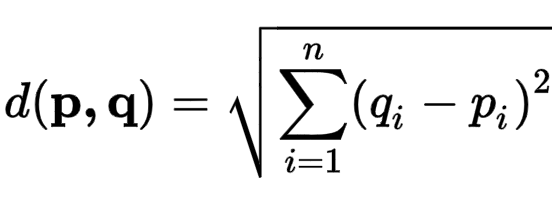

In [53]:
def euclidean_distance(a,b,eval,enc,dec,sk,pk,log_slots,num_slots,context):

  msg1 = heaan.Message(log_slots)
  msg2 = heaan.Message(log_slots)
  for i in range(num_slots):
    msg1[i] = a[i]
    msg2[i] = b[i]

  # sub
  ctxt1 = heaan.Ciphertext(context)
  ctxt2 = heaan.Ciphertext(context)
  ctxt3 = heaan.Ciphertext(context)

  enc.encrypt(msg1, pk, ctxt1)
  enc.encrypt(msg2, pk, ctxt2)
  eval.sub(ctxt1, ctxt2, ctxt3)

  # square
  ctxt_square = heaan.Ciphertext(context)
  eval.square(ctxt3, ctxt_square)

  # sigma
  ctxt_sig = heaan.Ciphertext(context)
  eval.left_rotate_reduce(ctxt_square,1,num_slots,ctxt_sig)

  # sqrt
  ## ctxt_sig is bigger than 2
  ## input range : 2^-18 ≤ x ≤ 2

  eval.mult(ctxt_sig,0.01,ctxt_sig)
  ctxt_sqrt = heaan.Ciphertext(context)
  approx.sqrt(eval,ctxt_sig,ctxt_sqrt)
  eval.mult(ctxt_sqrt,10,ctxt_sqrt)

  return ctxt_sqrt

### manhattan distance
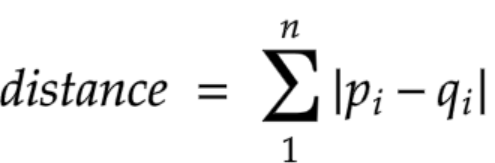

In [40]:
def manhattan_distance(a,b,eval,enc,dec,sk,pk,log_slots,num_slots,context):
  
  small_tmp_ctxt= heaan.Ciphertext(context)
  small_ctxt = heaan.Ciphertext(context)
  big_tmp_ctxt = heaan.Ciphertext(context)
  big_ctxt = heaan.Ciphertext(context)
  abs_ctxt = heaan.Ciphertext(context)
  res_ctxt = heaan.Ciphertext(context)
  ctxt1 = heaan.Ciphertext(context)
  ctxt2 = heaan.Ciphertext(context)
  ctxt3 = heaan.Ciphertext(context)

  msg1 = heaan.Message(log_slots)
  msg2 = heaan.Message(log_slots)
  for i in range(num_slots):
    msg1[i] = a[i]
    msg2[i] = b[i]

  enc.encrypt(msg1, pk, ctxt1)
  enc.encrypt(msg2, pk, ctxt2)

  ## if ctxt1 < ctxt2 -> 0
  comp_ctxt = heaan.Ciphertext(context)
  approx.compare(eval, ctxt1, ctxt2, comp_ctxt)

  ## discrete equal zero 
  ## input range : |x| ≤ 54 (x : int)
  discrete_ctxt = heaan.Ciphertext(context)
  two_msg = heaan.Message(log_slots)
  for i in range(num_slots):
    two_msg[i] = 2
  two_ctxt = heaan.Ciphertext(context)
  enc.encrypt(two_msg,pk,two_ctxt)

  comp_tmp_ctxt = heaan.Ciphertext(context)
  eval.mult(two_ctxt,comp_ctxt,comp_tmp_ctxt)
  approx.discrete_equal_zero(eval, comp_tmp_ctxt, discrete_ctxt)

  # sub
  eval.sub(ctxt1, ctxt2, ctxt3)

  # small_tmp_ctxt = 마이너스 값들만 남음
  eval.mult(ctxt3,discrete_ctxt,small_tmp_ctxt)
  # small_ctxt = - -> +
  eval.negate(small_tmp_ctxt,small_ctxt)

  one_msg = heaan.Message(log_slots)
  for i in range(num_slots):
    one_msg[i] = 1
  one_ctxt = heaan.Ciphertext(context)
  enc.encrypt(one_msg, pk, one_ctxt)

  eval.sub(one_ctxt,discrete_ctxt,big_tmp_ctxt)
  eval.mult(big_tmp_ctxt,ctxt3,big_ctxt)
  eval.add(big_ctxt,small_ctxt,abs_ctxt)

  ## sigma
  eval.left_rotate_reduce(abs_ctxt,1,num_slots,res_ctxt)

  return res_ctxt

절댓값 구하는 방법
1. 뺀 값 제곱 후 루트
2. compare -> discrete equal -> negate

### Compare with threshold

cos_similarity - threshold >0 일때, accept

In [41]:
## 현재 : 뺀 값을 approx sign을 돌림
## compare 함수쓰면 바로 가능


def compare(type,thres,comp_ctxt,eval,enc,dec,sk,pk,log_slots,num_slots,context):
  thres_list = []
  thres_list.append(thres)

  thres_list += (num_slots-len(thres_list))*[0]

  thres_msg = heaan.Message(log_slots)
  for i in range(num_slots):
    thres_msg[i] = thres_list[i]

  sub_ctxt = heaan.Ciphertext(context)
  if type == 'cosine':
    eval.sub(comp_ctxt,thres_msg,sub_ctxt)
  elif type == 'euclidean' or 'manhattan':
    thres_ctxt = heaan.Ciphertext(context)
    enc.encrypt(thres_msg, pk, thres_ctxt)
    eval.sub(thres_ctxt,comp_ctxt,sub_ctxt)
  ## cos_similarity - threshold > 0 이면 그 값을 1로 (그냥 그 뺀값도 숨겨버려려)

  sign_ctxt = heaan.Ciphertext(context)
  approx.sign(eval, sub_ctxt, sign_ctxt)

  res = heaan.Message(log_slots)
  dec.decrypt(sign_ctxt, sk, res)

  real = res[0].real
  if -0.0001 < 1-real < 0.0001:
    res = 'This is ME!'
  else:
    res = 'Who are you?'

  return res

### 실행코드 

In [42]:
res_ctxt = cosin_sim(a,b,eval,enc,dec,sk,pk,log_slots,num_slots,context)

res = heaan.Message(log_slots)
dec.decrypt(res_ctxt, sk, res)
print("cosine similarity : ", res)

1 :  [ (-0.003989+0.000000j), (-0.005005+0.000000j), (0.021639+0.000000j), (-0.002415+0.000000j), (-0.000384+0.000000j), ..., (0.000000+0.000000j), (0.000000+0.000000j), (0.000000+0.000000j), (0.000000+0.000000j), (0.000000+0.000000j) ]
2 :  [ (14.083886+0.000000j), (14.083886+0.000000j), (14.083886+0.000000j), (14.083886+0.000000j), (14.083886+0.000000j), ..., (14.083886+0.000000j), (14.083886+0.000000j), (14.083886+0.000000j), (14.083886+0.000000j), (14.083886+0.000000j) ]
3 :  [ (0.002213+0.000000j), (0.022586+0.000000j), (0.011991+0.000000j), (0.000423+0.000000j), (0.017493+0.000000j), ..., (0.000000+0.000000j), (0.000000+0.000000j), (0.000000+0.000000j), (0.000000+0.000000j), (0.000000+0.000000j) ]
4 :  [ (0.007192+0.000000j), (0.001109+0.000000j), (0.039053+0.000000j), (0.013782+0.000000j), (0.000008+0.000000j), ..., (0.000000+0.000000j), (0.000000+0.000000j), (0.000000+0.000000j), (0.000000+0.000000j), (0.000000+0.000000j) ]
5 :  [ (25.356016+0.000000j), (25.356016+0.000000j), (

In [43]:
# cosine similarity > threshold -> accept

thres = 0.7
type = 'cosine'
result = compare(type,thres,res_ctxt,eval,enc,dec,sk,pk,log_slots,num_slots,context)
print(result)

Who are you?


In [54]:
res_ctxt = euclidean_distance(a,b,eval,enc,dec,sk,pk,log_slots,num_slots,context)

res = heaan.Message(log_slots)
dec.decrypt(res_ctxt, sk, res)
print("euclidean distance : ", res)

1 :  [ (17.330218+0.000000j), (17.330218+0.000000j), (17.330218+0.000000j), (17.330218+0.000000j), (17.330218+0.000000j), ..., (17.330218+0.000000j), (17.330218+0.000000j), (17.330218+0.000000j), (17.330218+0.000000j), (17.330218+0.000000j) ]
euclidean distance :  [ (4.162958+0.000000j), (4.162958+0.000000j), (4.162958+0.000000j), (4.162958+0.000000j), (4.162958+0.000000j), ..., (4.162958+0.000000j), (4.162958+0.000000j), (4.162958+0.000000j), (4.162958+0.000000j), (4.162958+0.000000j) ]


In [45]:
# euclidean distance < threshold -> accept
thres = 0.07
type = 'euclidean'
result = compare(type,thres,res_ctxt,eval,enc,dec,sk,pk,log_slots,num_slots,context)
print(result)

Who are you?


In [46]:
res_ctxt = manhattan_distance(a,b,eval,enc,dec,sk,pk,log_slots,num_slots,context)

res = heaan.Message(log_slots)
dec.decrypt(res_ctxt, sk, res)
print("manhattan distance : ", res)

manhattan distance :  [ (105.375178+0.000000j), (105.375178+0.000000j), (105.375178+0.000000j), (105.375178+0.000000j), (105.375178+0.000000j), ..., (105.375178+0.000000j), (105.375178+0.000000j), (105.375178+0.000000j), (105.375178+0.000000j), (105.375178+0.000000j) ]


In [47]:
# manhattan distance < threshold -> accept
thres = 0.2
type = 'manhattan'
result = compare(type,thres,res_ctxt,eval,enc,dec,sk,pk,log_slots,num_slots,context)
print(result)

Who are you?


### cosine similarity 평문

In [48]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

doc1 = np.array(a)
doc2 = np.array(b)

print('문서 1과 문서2의 유사도 :',cos_sim(doc1, doc2))

문서 1과 문서2의 유사도 : 0.623205064631718


### euclidean 평문

In [49]:
import numpy as np
np_a = np.array(a)
np_b = np.array(b)

dist = np.linalg.norm(np_a-np_b)

print(dist)

4.162957901366788


### manhattan 평문

In [50]:
def manhattan(pt1, pt2):
  distance = 0
  for i in range(len(pt1)):
    distance += abs(pt1[i] - pt2[i])
  return distance

print(manhattan(a,b))

105.3751781269093
